# Plot against Baseline

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
sb.set_context("paper",  font_scale = 1,
               rc={
                   "grid.linewidth": 4,
                   'axes.labelsize': 32,
                   "axes.titlesize": 32,
                   "legend.fontsize": 32.0,
                   'lines.linewidth': 4,
                   'xtick.labelsize': 32.0,
                   'ytick.labelsize': 32.0,
               })

with open('baseline_values.pkl', 'rb') as fh:
    baseline_pareto = pickle.load(fh)

## Baseline Data
(1st column) Number of Parameters, (2nd column) Negative accuracy in percent*

*We used negative accuracy as you can minimize both size and accuracy in one go.

In [2]:
baseline_pareto

array([[ 8.80949400e+06, -7.69414740e+01],
       [ 2.84320000e+04, -5.86384692e+01]])

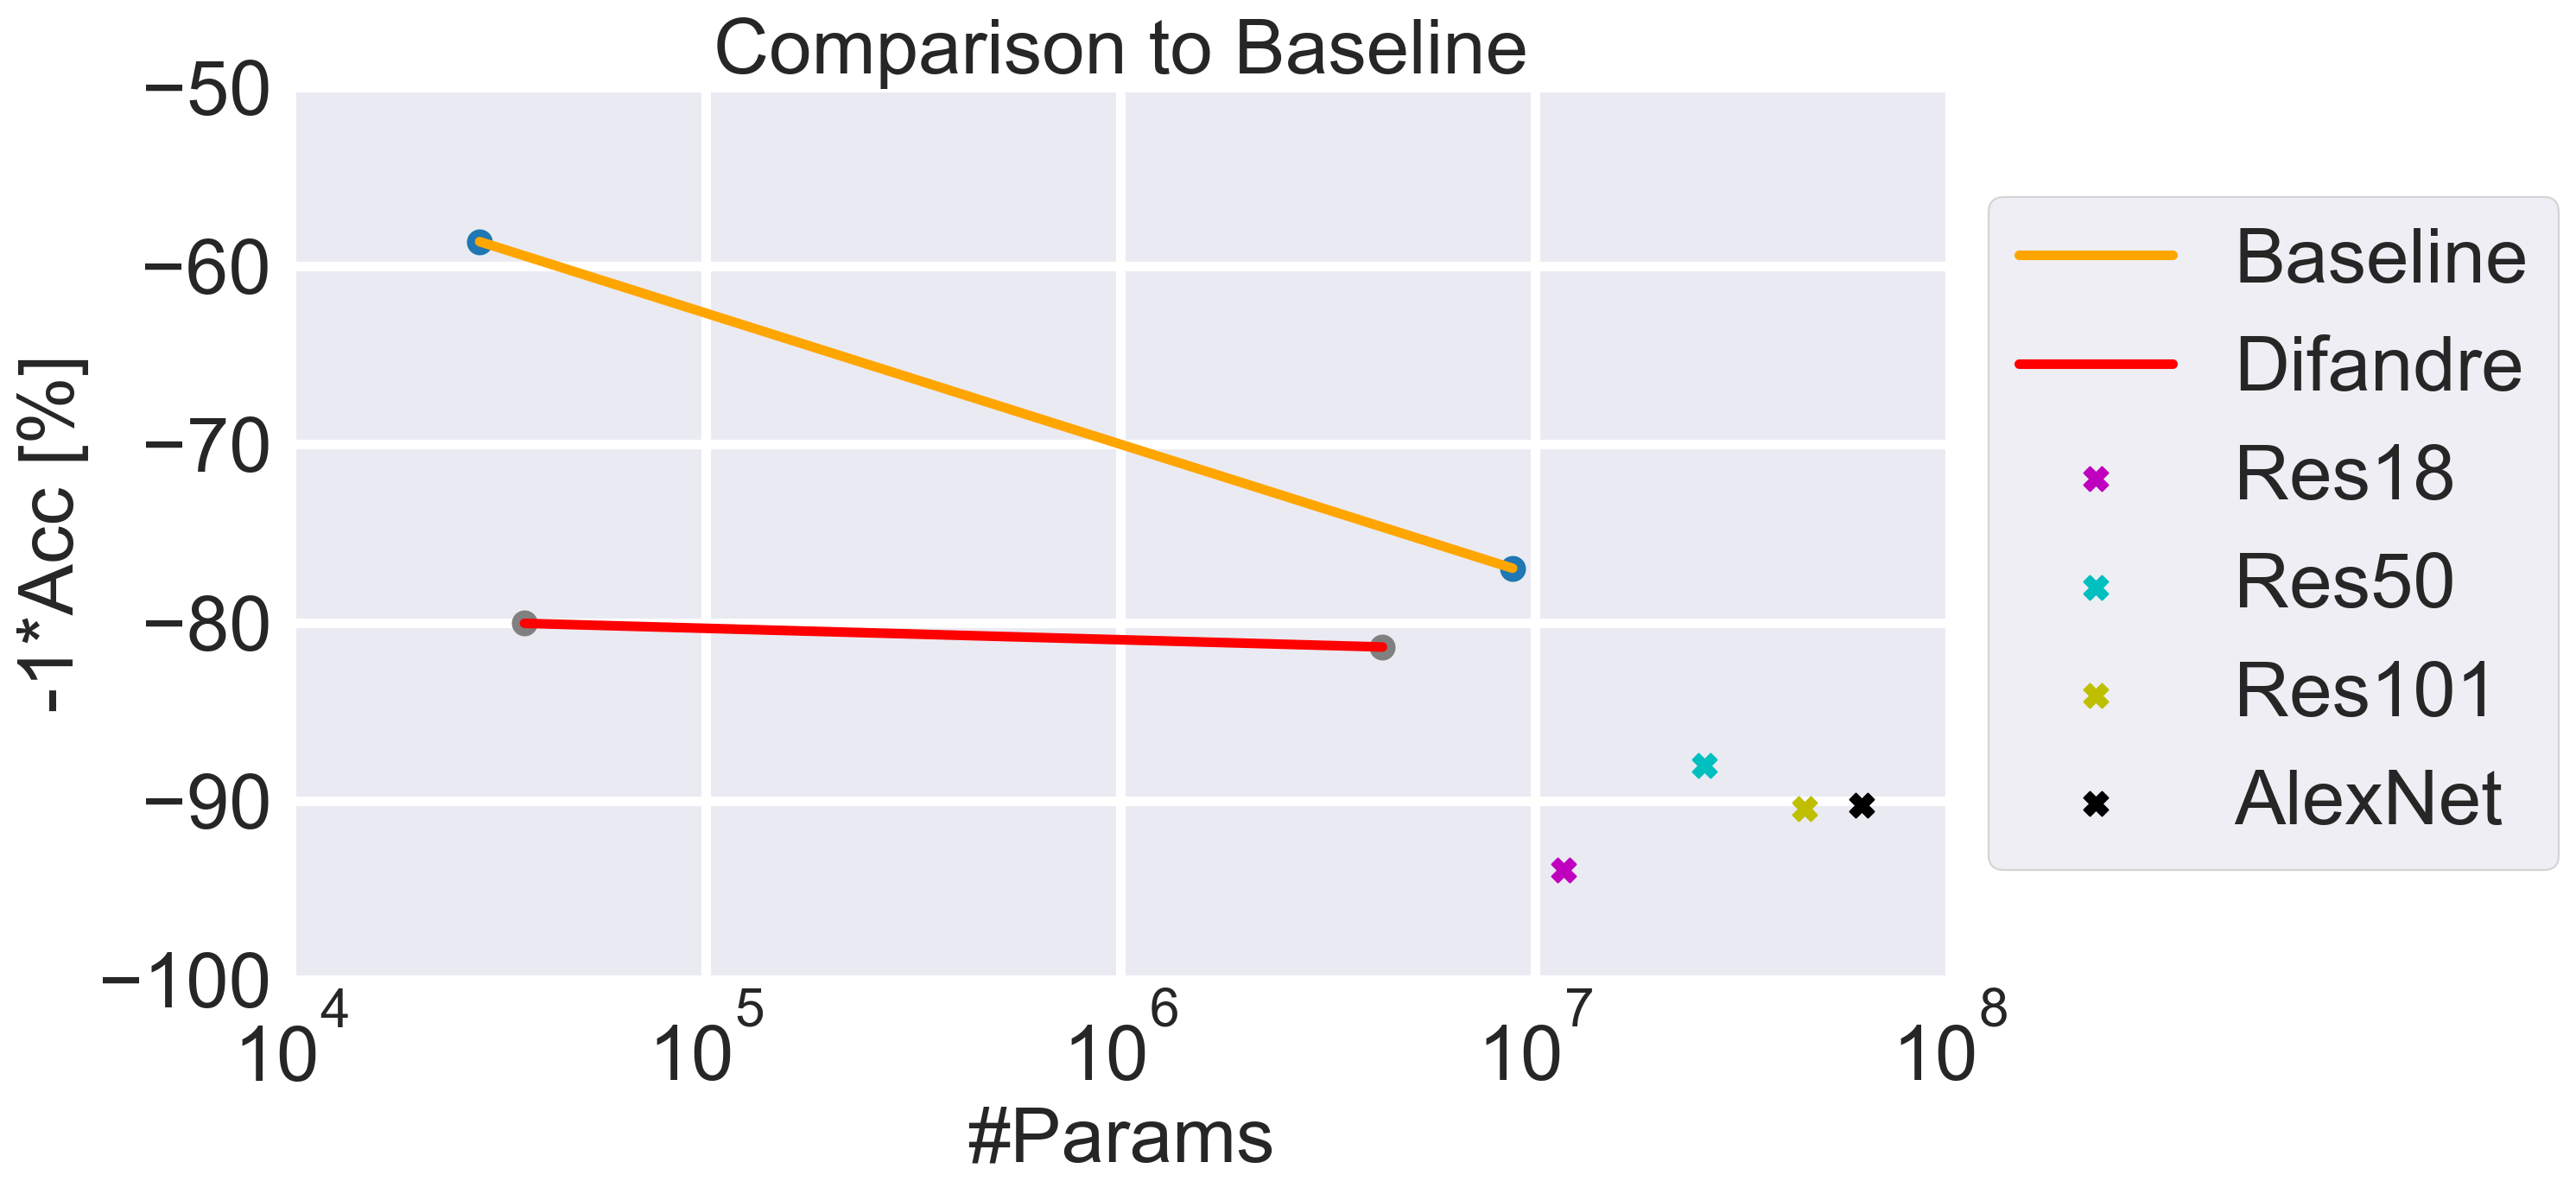

In [3]:
fig = plt.figure(figsize=(15, 7), dpi=200)

# Scatter points on pareto
plt.scatter(baseline_pareto[:, 0], baseline_pareto[:, 1], s=100)
plt.plot(baseline_pareto[:, 0], baseline_pareto[:, 1], c='orange', label='Baseline')

# Plot your own data here (Feel free to scatter all evaluated configuration results in the plot)
# TODO

# Example result by Difan and André
difandre = np.array([[ 4.27571700e+06, -8.13530869e+01], [ 3.64660000e+04, -8.00280941e+01]])
plt.scatter(difandre[:, 0], difandre[:, 1], s=100, c='gray')
plt.plot(difandre[:, 0], difandre[:, 1], c='red', label='Difandre')

# Example known networks
plt.scatter(11.69*10**6, -93.87, label='Res18', s=100,marker='X', c='m')
plt.scatter(25.56*10**6, -87.99, label='Res50', s=100,marker='X', c='c')
plt.scatter(44.55*10**6, -90.41, label='Res101', s=100,marker='X', c='y')
plt.scatter(61.10*10**6, -90.20, label='AlexNet', s=100,marker='X', c='k')


# Final
plt.title('Comparison to Baseline')
plt.xlabel('#Params')
plt.ylabel('-1*Acc [%]')
plt.semilogx()
plt.xlim([10**4, 10**8])
plt.ylim([-100, -50])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('baselines.pdf', dpi=200)
plt.show()

## Computation of Hypervolume

In [8]:
def computeHV2D(front, ref):
    """
    Compute the Hypervolume for the pareto front  (only implement it for 2D)
    :param front: (n_points, m_cost_values) array for which to compute the volume
    :param ref: coordinates of the reference point
    :returns: Hypervolume of the polygon spanned by all points in the front + the reference point
    """
    # We assume all points already sorted
    list_ = [ref]
    for x in front:
        elem_at = len(list_) -1
        list_.append([list_[elem_at][0], x[1]])  # add intersection points by keeping the x constant
        list_.append(x)
    list_.append([list_[-1][0], list_[0][1]])
    sorted_front = np.array(list_)
    def shoelace(x_y): # taken from https://stackoverflow.com/a/58515054
        x_y = np.array(x_y)
        x_y = x_y.reshape(-1,2)

        x = x_y[:,0]
        y = x_y[:,1]

        S1 = np.sum(x*np.roll(y,-1))
        S2 = np.sum(y*np.roll(x,-1))

        area = .5*np.absolute(S1 - S2)

        return area
    return shoelace(sorted_front)

In [9]:
# For the hypervolume computation we put the number of parameters on a log scale to reduce the dominance
ref_point = [np.log10(10**8), 0]  # use this reference point

log_baseline = baseline_pareto.copy()
log_baseline[:, 0] = np.log10(log_baseline[:, 0])
baseline_HV = computeHV2D(log_baseline, ref_point)

log_difandre = difandre.copy()
log_difandre[:, 0] = np.log10(log_difandre[:, 0])
difandre_HV = computeHV2D(log_difandre, ref_point)

# TODO compute your own HV

print('Baseline HV:', baseline_HV)
print('Difandre HV:', difandre_HV)

Baseline HV: 227.25387244991555
Difandre HV: 276.95944372911595
